In [3]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.random.seed(1234)
import scipy.stats as stats

In [18]:
def IBP(N, alpha):
    """Indian Buffet Process (IBP) steps:
    Input: N is the number of customers (objects, images); alpha is the only parameter;
    Return: result is the binary matrix (prior); Kplus is the number of dishes (features)"""
    result = np.zeros((N,1000))
    
    # Step 1: First customer takes a Poisson(alpha) of dishes
    t = stats.poisson.rvs(alpha) # (set the random seed when calling the function)
    if t > 0:
        result[0,0:t] = 1
    
    # Kplus = the number of features for which m_k > 0 (m_k: the number of previous customers who sampled that dish)
    Kplus = t
    for i in range(1,N):
        for k in range(Kplus):
            # Step 2: The ith customer takes dish k with probability m_k/i
            p = np.sum(result[0:(i+1),k])/(i+1) # this is a probability, so should be between 0 and 1
            assert p <= 1 
            assert p >= 0
            if stats.uniform.rvs(0) < p:
                result[i,k] = 1
            else:
                result[i,k] = 0
                
        # Step 3: The ith customer tries a Poisson(alpha/i) number of new dishes
        t = stats.poisson.rvs(alpha/(i+1))
        if t > 0:
            result[i,Kplus:(Kplus+t)] = 1
        Kplus += t
    result = result[:,0:Kplus]
    
    return result, Kplus

In [5]:
np.random.seed(12)
N1 = 100
alpha1 = 1.5

result1, Kplus1 = IBP(N1,alpha1)
print (Kplus1)

print (result1)

5
[[0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [1 1 1 0 0 0]
 [0 1 0 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0]
Latent feature matrices (A):


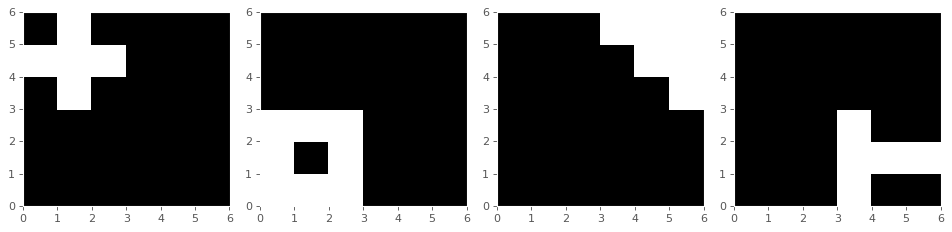

In [6]:
# Basis images
basis1 = np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,1,0,0,0,0],[1,1,1,0,0,0],[0,1,0,0,0,0]])
basis2 = np.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])
basis3 = np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,1],[0,0,0,0,1,1],[0,0,0,1,1,1]])
basis4 = np.array([[0,0,0,1,0,0],[0,0,0,1,1,1],[0,0,0,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])

print(basis1)
D = 36
b1 = basis1.reshape(D)
b2 = basis2.reshape(D)
b3 = basis3.reshape(D)
b4 = basis4.reshape(D)
A = np.array([b1,b2,b3,b4])

#heatmaps
plt.figure(num=None, tight_layout=True, figsize=(12,3), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(141)
plt.pcolormesh(basis1,cmap=plt.cm.gray)     
plt.subplot(142)
plt.pcolormesh(basis2,cmap=plt.cm.gray)  
plt.subplot(143)
plt.pcolormesh(basis3,cmap=plt.cm.gray)  
plt.subplot(144)
plt.pcolormesh(basis4,cmap=plt.cm.gray)  
# plt.savefig('basis_images.png')
print ("Latent feature matrices (A):")

Example image:
 [[ 0.2067  0.3588  0.1309  0.8786 -0.2506 -0.3491]
 [ 0.6923 -0.1432  0.25    1.9756  0.8608  1.0184]
 [ 0.2229 -0.7052  0.225   1.2577 -0.577  -0.6901]
 [-0.2479  0.7934 -0.8597 -0.0148 -0.383   1.0499]
 [ 0.6435 -0.1131  1.3629  0.4585  0.7181  0.2389]
 [-0.0071  0.8766 -0.0827  1.0596 -0.0375  0.4986]]


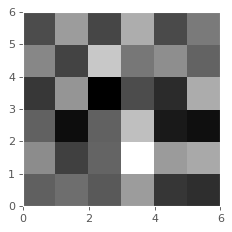

In [13]:
# Generate image data: 100 matrices of size 6*6
N = 100
D = 36
K = 4
sigmaX_orig = 0.5

# All K basis images, each of length D
# Generate N images (customers, objects)
np.random.seed(1234)
images = np.zeros((N,6,6)) # simulated image data
structure = np.zeros((N,6,6))  # 0/1 structure for each image
add = stats.bernoulli.rvs(0.5,size=(N,K)) # whether the K=4 latent bases are present in each image
epsilon = stats.norm.rvs(loc=0,scale=0.5,size = (N,6,6)) # random noise

for i in range(N):
    structure[i,:,:] = add[i,0]*basis1 + add[i,1]*basis2 + add[i,2]*basis3 + add[i,3]*basis4
    images[i,:,:] = structure[i,:,:] + epsilon[i,:,:]


# print images.shape
print ("Example image:\n",images[4])
plt.figure(tight_layout=True, figsize=(3,3),dpi=80)
plt.pcolormesh(images[4],cmap=plt.cm.gray)

In [15]:
# Image Initialization
np.random.seed(1)
Z_orig = np.zeros((N,4))
sigmaX_orig = 0.5
X = np.zeros((N,D))

for i in range(N):
    Z_orig[i,:] = stats.uniform.rvs(loc=0,scale=1,size=4) > 0.5
    while np.sum(Z_orig[i,:]) == 0:
        Z_orig[i,:] = stats.uniform.rvs(loc=0,scale=1,size=4) > 0.5
    X[i,:] = np.random.normal(size=D)*sigmaX_orig + np.dot(Z_orig[i,:],A)
    
print ("X.shape:",X.shape) # (100,36) = (N,D) (data)
print (X[0:6,0:6])
print (Z_orig.shape)
print (Z_orig[0:6,:])
# print np.dot(Z_orig[i,:],A).shape

X.shape: (100, 36)
[[ 0.7359  0.4635  1.4327 -1.1508  0.8724 -0.3806]
 [ 0.6264  1.8462  1.0254 -0.3185  0.0955  1.0501]
 [ 0.8888  0.8996  1.0933  1.205   0.0991  0.0595]
 [ 1.5607  1.2045  0.9877 -0.3876  0.6369  0.9836]
 [ 0.9318  0.9405  1.0087  0.439  -0.2585 -0.4985]
 [ 1.3012  1.2101  1.4055  1.5222 -0.2004  0.412 ]]
(100, 4)
[[0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 0. 0.]
 [1. 1. 0. 1.]
 [1. 1. 0. 1.]]


In [19]:
# Initialization for IBP
N = 100
D = 36
K = 4
sigmaA = 1
sigmaX = 1

# np.random.seed(1005)
np.random.seed(1)
alpha = 1

K_inf = 1000
Z, Kplus = IBP(N, alpha)
print ("Initial Kplus:", Kplus)
print ("Z.shape:",Z.shape) # (100,4) = (N,Kplus) (latent)
print ("A.shape:",A.shape) # (4,36) = (Kplus,D)  (weight)

# Set Markov Chain MC steps
mcmc = 1000 # plan to sample for 1000 times

# Setup the array
Z_arr = np.zeros((mcmc,N,K_inf))
Kplus_arr = np.zeros(mcmc)
sigmaX_arr = np.zeros(mcmc)
sigmaA_arr = np.zeros(mcmc)
alpha_arr = np.zeros(mcmc)
rX_accept = 0
rA_accept = 0

Initial Kplus: 4
Z.shape: (100, 4)
A.shape: (4, 36)


In [20]:
# Check gamma distribution 
np.random.seed(17)
rv = stats.gamma.rvs(a = 3, loc = 0, scale = 2, size=1000)
print (np.mean(rv))  # should be close to 3*2 = 6
print (np.var(rv))   # should be close to 3*2*2 = 12

6.1108245519792135
12.383632613458975


In [24]:
# Gibbs Sampler functions
def calcM(Z,Kplus,sigmaX,sigmaA):
    """Save the matrix M so we won't need to calculate it again and again"""
    return np.linalg.inv(np.dot(Z[:,0:Kplus].T,Z[:,0:Kplus])+((sigmaX/sigmaA)**2)*np.identity(Kplus))

def calcInverse_orig(Z, M, i, k, val):
    """Effective inverse calculation from Griffiths and Ghahramani (2005; Equations 51 to 54)
    M_(-i) = inv(inv(M) - zi.T * zi)"""
    M_i = M - np.dot(np.dot(M,Z[i,:].T),np.dot(Z[i,:],M))/(np.dot(np.dot(Z[i,:],M),Z[i,:].T)-1)
    Z[i,k] = val
    M = M_i - np.dot(np.dot(M_i,Z[i,:].T),np.dot(Z[i,:],M_i))/(np.dot(np.dot(Z[i,:],M_i),Z[i,:].T)+1)
    Inv = M
    return Inv

def calcInverse(Z, M, i, k, val):
    """New version to check: M_(-i) = inv(inv(M) - zi.T * zi) and M = inv(inv(M_(-i)) + zi.T * zi)"""
    M_i = np.linalg.inv(np.linalg.inv(M) - np.dot(Z[i,:].T,Z[i,:]))
    Z[i,k] = val
    M = np.linalg.inv(np.linalg.inv(M_i) + np.dot(Z[i,:].T,Z[i,:]))
    return M

def log_likelihood(X,Z,M,sigmaA,sigmaX,Kplus,N,D):  
    """Calculate the log-likelihood: P(X|Z,M,sigmaA,sigmaX,Kplus,N,D)"""  
    determinant = np.linalg.det(np.dot(Z.T,Z)+((sigmaX/sigmaA)**2)*np.identity(Kplus))
    constant = N*D*0.5*np.log(2*np.pi) + (N-Kplus)*D*np.log(sigmaX) + Kplus*D*np.log(sigmaA) + D*0.5*np.log(determinant)
    
    middle = np.identity(N) - np.dot(np.dot(Z, M),Z.T)
    trace = np.trace(np.dot(np.dot(X.T,middle),X))
    kernel = -0.5*np.reciprocal(sigmaX**2)*trace
    
    log_lik = -constant + kernel
    return log_lik

In [26]:
print(Z.shape)
M = calcM(Z,Kplus,sigmaX,sigmaA) 
log_likelihood(X,Z[:,0:Kplus],M,sigmaA,sigmaX,Kplus,N,D)

(100, 4)


-4274.774747709113

In [29]:
assert Kplus > 0
assert N > 0
assert D > 0
assert sigmaX > 0
assert sigmaA > 0

# Harmonics
from fractions import Fraction
sum_Harmonics = 0
Harmonics = 0
for i in range(N):
    sum_Harmonics += (N-i)*Fraction(1,i+1)
    Harmonics += Fraction(1,i+1)

# Gibbs Sampler -- Steps
np.random.seed(111)

for mc in range(1000):

    # Step 0: Save generated parameters to the MCMC array
    Z_arr[mc,:,0:Kplus] = Z[:,0:Kplus]
    
    alpha_arr[mc] = alpha
    Kplus_arr[mc] = Kplus
    sigmaX_arr[mc] = sigmaX
    sigmaA_arr[mc] = sigmaA
    print ("At iteration",mc,": Kplus is",Kplus,", alpha is",alpha)

    # Step 1: Generate Z|alpha (Gibbs)
    for i in range(N):
        
        for k in range(Kplus):
            # This is possible because Kplus may decrease in this loop (e.g. dropping redundant zeros)
            if (k+1) > Kplus:
                break
            if Z[i,k] > 0:
                # Take care of singular features
                # Get rid of the features not sampled (remove the zeros)
                if np.sum(Z[:,k]) - Z[i,k] <= 0: # whether the dish is sampled by other customers or not
                    Z[:,k:(Kplus-1)] = Z[:,(k+1):Kplus]
                    Kplus -= 1       
                    continue            
            
            P = np.zeros(2)
            Z[i,k] = 1
            M1 = calcM(Z,Kplus,sigmaX,sigmaA) 
            P[1] = log_likelihood(X,Z[:,0:Kplus],M1,sigmaA,sigmaX,Kplus,N,D) + np.log(sum(Z[:,k])-Z[i,k]) - np.log(N)
            Z[i,k] = 0
            M0 = calcM(Z,Kplus,sigmaX,sigmaA) 
            P[0] = log_likelihood(X,Z[:,0:Kplus],M0,sigmaA,sigmaX,Kplus,N,D) + np.log(N-sum(Z[:,k])) - np.log(N)
            P = np.exp(P - max(P))
            # Sample from the posterior distribution
            rand = stats.uniform.rvs(loc=0,scale=1,size=1)           
            if rand < P[0]/(P[0]+P[1]):
                Z[i,k] = 0
            else:
                Z[i,k] = 1
                
        trun = np.zeros(4)
        alphaN = alpha/N      
        
        # for ki in range(5):
        for ki in range(4):
            if ki > 0:
                new_stack = np.zeros((N,ki))
                new_stack[i,:] = 1
                Z = np.hstack((Z[:,0:Kplus],new_stack))
            M = np.linalg.inv(np.dot(Z[:,0:(Kplus+ki)].T,Z[:,0:(Kplus+ki)])+((sigmaX/sigmaA)**2)*np.identity(Kplus+ki))
            # Prior: x ~ Pois(lambda): f(x) = ((lambda**x)/x!)*exp(-lambda), where x = ki, lambda = alphaN
            
            trun[ki] = (ki)*np.log(alphaN) - alphaN - np.log(np.math.factorial(ki)) 
            # posterior is proportional to prior x likelihood
            trun[ki] += log_likelihood(X,Z[:,0:(Kplus+ki)],M,sigmaA,sigmaX,Kplus+ki,N,D)
            
        # Z[i,Kplus:(Kplus+4)] = 0
        Z[i,Kplus:(Kplus+3)] = 0
        trun = np.exp(trun-max(trun))
        trun = trun/np.sum(trun)
        
        p = stats.uniform.rvs(loc=0,scale=1,size=1)  
        t = 0
        # for ki in range(5):
        for ki in range(4):
            t += trun[ki]
            if p < t:
                new_dishes = ki
                break
        Z[i,Kplus:(Kplus+new_dishes)] = 1
        Kplus += new_dishes
        
    # Step 2: Sample sigmaX_star (Metropolis)
    # M = calcM(Z, Kplus+new_dishes, sigmaX, sigmaA)
    M = calcM(Z, Kplus, sigmaX, sigmaA)
    #logLik = log_likelihood(X, Z[:,0:(Kplus+new_dishes)], M, sigmaA, sigmaX, Kplus+new_dishes, N, D)
    logLik = log_likelihood(X, Z[:,0:Kplus], M, sigmaA, sigmaX, Kplus, N, D)
    epsilonX = stats.uniform.rvs(loc=0,scale=1,size=1) 
    if epsilonX < 0.5:
        # sigmaX_star = sigmaX - epsilonX/40
        # sigmaX_star = sigmaX - epsilonX/20
        sigmaX_star = sigmaX - stats.uniform.rvs(loc=0,scale=1,size=1)/20
    else:
        # sigmaX_star = sigmaX + epsilonX/20   
        sigmaX_star = sigmaX + stats.uniform.rvs(loc=0,scale=1,size=1)/20 
    # M_Xstar = calcM(Z, Kplus+new_dishes, sigmaX_star, sigmaA)
    M_Xstar = calcM(Z, Kplus, sigmaX_star, sigmaA)
    # logLikX_star = log_likelihood(X, Z[:,0:(Kplus+new_dishes)], M_Xstar, sigmaA, sigmaX_star, Kplus+new_dishes, N, D)
    logLikX_star = log_likelihood(X, Z[:,0:Kplus], M_Xstar, sigmaA, sigmaX_star, Kplus, N, D)
    acc_X = np.exp(min(0, logLikX_star-logLik))
    
    # Step 3: Sample sigmaA_star (Metropolis)
    epsilonA = stats.uniform.rvs(loc=0,scale=1,size=1)
    if epsilonA < 0.5:
        # sigmaA_star = sigmaA - epsilonA/20
        sigmaA_star = sigmaA - stats.uniform.rvs(loc=0,scale=1,size=1)/20
    else:
        # sigmaA_star = sigmaA + epsilonA/40 
        sigmaA_star = sigmaA + stats.uniform.rvs(loc=0,scale=1,size=1)/20
        # sigmaA_star = sigmaA + epsilonA/20   
    # M_Astar = calcM(Z, Kplus+new_dishes, sigmaX, sigmaA_star)
    M_Astar = calcM(Z, Kplus, sigmaX, sigmaA_star)
    # logLikA_star = log_likelihood(X, Z[:,0:(Kplus+new_dishes)], M_Astar, sigmaA_star, sigmaX, Kplus+new_dishes, N, D)
    logLikA_star = log_likelihood(X, Z[:,0:Kplus], M_Astar, sigmaA_star, sigmaX, Kplus, N, D)
    acc_A = np.exp(min(0, logLikA_star-logLik))
    
    randX = stats.uniform.rvs(loc=0,scale=1,size=1)
    if randX < acc_X:
        sigmaX = sigmaX_star
        rX_accept += 1
    randA = stats.uniform.rvs(loc=0,scale=1,size=1)
    if randA < acc_A:
        sigmaA = sigmaA_star
        rA_accept += 1
    
    # Step 4: Sample alpha|Z ~ Ga(a=1+Kplus,scale=1+Harmonics)
    alpha = stats.gamma.rvs(a = 1+Kplus, loc = 0, scale = np.reciprocal(1+Harmonics),size=1)[0]

At iteration 0 : Kplus is 1 , alpha is 1
At iteration 1 : Kplus is 1 , alpha is 0.11207627192475879
At iteration 2 : Kplus is 1 , alpha is 0.21638475084954692
At iteration 3 : Kplus is 1 , alpha is 0.11549679181206603
At iteration 4 : Kplus is 1 , alpha is 1.2336888796529792
At iteration 5 : Kplus is 1 , alpha is 0.5835851164990074
At iteration 6 : Kplus is 1 , alpha is 0.4795213051398282
At iteration 7 : Kplus is 1 , alpha is 0.345682290039496
At iteration 8 : Kplus is 1 , alpha is 0.10866090393650225
At iteration 9 : Kplus is 1 , alpha is 0.6784030444639769
At iteration 10 : Kplus is 1 , alpha is 0.04046349845905792
At iteration 11 : Kplus is 1 , alpha is 0.07882121127723953
At iteration 12 : Kplus is 1 , alpha is 0.19275152823506916
At iteration 13 : Kplus is 1 , alpha is 0.08548163064578597
At iteration 14 : Kplus is 1 , alpha is 0.17090312727236115
At iteration 15 : Kplus is 1 , alpha is 0.07370598605547439
At iteration 16 : Kplus is 1 , alpha is 0.20488614538274963
At iteration 1

At iteration 139 : Kplus is 6 , alpha is 0.7860686536689823
At iteration 140 : Kplus is 7 , alpha is 0.9400089235793678
At iteration 141 : Kplus is 6 , alpha is 1.1583126254951168
At iteration 142 : Kplus is 6 , alpha is 1.4511967140112922
At iteration 143 : Kplus is 7 , alpha is 1.3894027605371388
At iteration 144 : Kplus is 6 , alpha is 0.9083139036006836
At iteration 145 : Kplus is 6 , alpha is 0.8962571997382854
At iteration 146 : Kplus is 6 , alpha is 1.2158078497158615
At iteration 147 : Kplus is 8 , alpha is 0.5711505620311168
At iteration 148 : Kplus is 8 , alpha is 1.2435993543220805
At iteration 149 : Kplus is 6 , alpha is 0.8829874322131915
At iteration 150 : Kplus is 5 , alpha is 0.7463765269774424
At iteration 151 : Kplus is 5 , alpha is 1.361761898957821
At iteration 152 : Kplus is 5 , alpha is 1.0227159201569203
At iteration 153 : Kplus is 7 , alpha is 1.7076512029368422
At iteration 154 : Kplus is 6 , alpha is 0.874604018288438
At iteration 155 : Kplus is 6 , alpha is 0

At iteration 276 : Kplus is 5 , alpha is 0.5837149810435969
At iteration 277 : Kplus is 6 , alpha is 1.0853916350023805
At iteration 278 : Kplus is 6 , alpha is 1.1358586580276273
At iteration 279 : Kplus is 7 , alpha is 2.074073435198216
At iteration 280 : Kplus is 9 , alpha is 1.2790717477311067
At iteration 281 : Kplus is 7 , alpha is 0.5578352420635337
At iteration 282 : Kplus is 5 , alpha is 1.4582515245276837
At iteration 283 : Kplus is 6 , alpha is 1.143805066991472
At iteration 284 : Kplus is 7 , alpha is 1.0138405028952355
At iteration 285 : Kplus is 7 , alpha is 2.0082376652299607
At iteration 286 : Kplus is 7 , alpha is 0.5841253404419084
At iteration 287 : Kplus is 5 , alpha is 1.2796658032967598
At iteration 288 : Kplus is 6 , alpha is 1.606659006827065
At iteration 289 : Kplus is 6 , alpha is 1.073436999108948
At iteration 290 : Kplus is 6 , alpha is 1.39052556138453
At iteration 291 : Kplus is 7 , alpha is 1.5690238108791474
At iteration 292 : Kplus is 7 , alpha is 1.194

At iteration 413 : Kplus is 5 , alpha is 1.2121261931464042
At iteration 414 : Kplus is 6 , alpha is 0.8289613892050987
At iteration 415 : Kplus is 7 , alpha is 1.4336881102812749
At iteration 416 : Kplus is 5 , alpha is 1.1379221997198077
At iteration 417 : Kplus is 6 , alpha is 0.7045248754790506
At iteration 418 : Kplus is 6 , alpha is 1.5173430938847954
At iteration 419 : Kplus is 5 , alpha is 1.1995696413677113
At iteration 420 : Kplus is 6 , alpha is 2.7091638443680353
At iteration 421 : Kplus is 6 , alpha is 1.038963561075138
At iteration 422 : Kplus is 6 , alpha is 0.7798983377329632
At iteration 423 : Kplus is 6 , alpha is 1.465443034773316
At iteration 424 : Kplus is 6 , alpha is 0.45590038198042787
At iteration 425 : Kplus is 6 , alpha is 1.0584900144502511
At iteration 426 : Kplus is 6 , alpha is 1.6627317843275373
At iteration 427 : Kplus is 7 , alpha is 1.1413834295504097
At iteration 428 : Kplus is 8 , alpha is 1.1283663484107453
At iteration 429 : Kplus is 6 , alpha is 

At iteration 550 : Kplus is 6 , alpha is 0.6680935128407377
At iteration 551 : Kplus is 5 , alpha is 0.8694687183712488
At iteration 552 : Kplus is 6 , alpha is 1.7059592778694561
At iteration 553 : Kplus is 7 , alpha is 0.39604141133876125
At iteration 554 : Kplus is 7 , alpha is 0.797719956844753
At iteration 555 : Kplus is 5 , alpha is 1.0538767184836992
At iteration 556 : Kplus is 5 , alpha is 1.034650722605213
At iteration 557 : Kplus is 6 , alpha is 1.4034265722852908
At iteration 558 : Kplus is 7 , alpha is 0.9220798143146266
At iteration 559 : Kplus is 6 , alpha is 0.4336486497339009
At iteration 560 : Kplus is 6 , alpha is 1.39220205179924
At iteration 561 : Kplus is 6 , alpha is 1.1362691910837481
At iteration 562 : Kplus is 7 , alpha is 0.4787198474210025
At iteration 563 : Kplus is 6 , alpha is 2.236604675569272
At iteration 564 : Kplus is 6 , alpha is 1.0715119501658006
At iteration 565 : Kplus is 6 , alpha is 0.8728003531388715
At iteration 566 : Kplus is 6 , alpha is 1.1

At iteration 687 : Kplus is 7 , alpha is 1.6624833849354188
At iteration 688 : Kplus is 6 , alpha is 0.9178690852671803
At iteration 689 : Kplus is 7 , alpha is 1.7474381375198955
At iteration 690 : Kplus is 6 , alpha is 1.0294782804232567
At iteration 691 : Kplus is 6 , alpha is 0.8687565304081329
At iteration 692 : Kplus is 6 , alpha is 1.1303845163445505
At iteration 693 : Kplus is 5 , alpha is 1.2748102297052082
At iteration 694 : Kplus is 5 , alpha is 2.0504165224659707
At iteration 695 : Kplus is 5 , alpha is 0.6549443973066696
At iteration 696 : Kplus is 5 , alpha is 0.22212724896644356
At iteration 697 : Kplus is 6 , alpha is 1.6382586341643839
At iteration 698 : Kplus is 6 , alpha is 2.441326294275556
At iteration 699 : Kplus is 8 , alpha is 1.7075685217497454
At iteration 700 : Kplus is 7 , alpha is 1.1523889395118678
At iteration 701 : Kplus is 5 , alpha is 0.8764127329105963
At iteration 702 : Kplus is 6 , alpha is 2.1090655627540444
At iteration 703 : Kplus is 6 , alpha is

At iteration 824 : Kplus is 8 , alpha is 1.4188596978317236
At iteration 825 : Kplus is 5 , alpha is 1.2474123879420385
At iteration 826 : Kplus is 6 , alpha is 0.6871854214864486
At iteration 827 : Kplus is 6 , alpha is 0.875589166833487
At iteration 828 : Kplus is 6 , alpha is 1.7503304645480202
At iteration 829 : Kplus is 7 , alpha is 1.2058224234537729
At iteration 830 : Kplus is 6 , alpha is 1.0916327023775831
At iteration 831 : Kplus is 8 , alpha is 1.1831225164530421
At iteration 832 : Kplus is 7 , alpha is 1.3384001494676059
At iteration 833 : Kplus is 8 , alpha is 1.3547225120962028
At iteration 834 : Kplus is 6 , alpha is 0.9583575107844837
At iteration 835 : Kplus is 5 , alpha is 0.5904394670648371
At iteration 836 : Kplus is 5 , alpha is 0.8964826852960496
At iteration 837 : Kplus is 5 , alpha is 1.2043998288159294
At iteration 838 : Kplus is 7 , alpha is 1.8750328907853029
At iteration 839 : Kplus is 6 , alpha is 0.6735689239875065
At iteration 840 : Kplus is 7 , alpha is 

At iteration 961 : Kplus is 6 , alpha is 0.8237439490894403
At iteration 962 : Kplus is 5 , alpha is 0.8074123237396869
At iteration 963 : Kplus is 6 , alpha is 1.40855718609343
At iteration 964 : Kplus is 6 , alpha is 0.49241981927885253
At iteration 965 : Kplus is 5 , alpha is 0.8592868145736529
At iteration 966 : Kplus is 5 , alpha is 1.1005098162987428
At iteration 967 : Kplus is 6 , alpha is 1.453746238430392
At iteration 968 : Kplus is 5 , alpha is 0.8722534047615601
At iteration 969 : Kplus is 6 , alpha is 1.7096997746138118
At iteration 970 : Kplus is 6 , alpha is 0.7507491717228132
At iteration 971 : Kplus is 6 , alpha is 1.1074901977372302
At iteration 972 : Kplus is 6 , alpha is 0.5768871323144393
At iteration 973 : Kplus is 5 , alpha is 1.4793781472347918
At iteration 974 : Kplus is 7 , alpha is 2.002501272047568
At iteration 975 : Kplus is 7 , alpha is 1.4399257149060432
At iteration 976 : Kplus is 7 , alpha is 0.6399100358973066
At iteration 977 : Kplus is 5 , alpha is 0.